# [Example] Build a scorecard with high explainability and good predictability with Scorecard-Bundle

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Download-sample-data" data-toc-modified-id="Download-sample-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Download sample data</a></span></li><li><span><a href="#Handle-categorical-features-and-missing-values" data-toc-modified-id="Handle-categorical-features-and-missing-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Handle categorical features and missing values</a></span></li><li><span><a href="#Define-feature-and-target" data-toc-modified-id="Define-feature-and-target-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Define feature and target</a></span></li></ul></li><li><span><a href="#Scorecard-Model" data-toc-modified-id="Scorecard-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scorecard Model</a></span><ul class="toc-item"><li><span><a href="#Feature-Discretization-with-ChiMerge" data-toc-modified-id="Feature-Discretization-with-ChiMerge-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Feature Discretization with ChiMerge</a></span></li><li><span><a href="#Evaluate-Predictabilty" data-toc-modified-id="Evaluate-Predictabilty-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Evaluate Predictabilty</a></span></li><li><span><a href="#Feature-Engineering-(manually-adjusting-feature-intervals)" data-toc-modified-id="Feature-Engineering-(manually-adjusting-feature-intervals)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Feature Engineering (manually adjusting feature intervals)</a></span><ul class="toc-item"><li><span><a href="#latitude" data-toc-modified-id="latitude-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>latitude</a></span></li><li><span><a href="#median_income" data-toc-modified-id="median_income-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>median_income</a></span></li><li><span><a href="#total_rooms" data-toc-modified-id="total_rooms-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>total_rooms</a></span></li><li><span><a href="#total_bedrooms" data-toc-modified-id="total_bedrooms-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>total_bedrooms</a></span></li><li><span><a href="#housing_median_age" data-toc-modified-id="housing_median_age-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>housing_median_age</a></span></li><li><span><a href="#longitude" data-toc-modified-id="longitude-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>longitude</a></span></li><li><span><a href="#households" data-toc-modified-id="households-2.3.7"><span class="toc-item-num">2.3.7&nbsp;&nbsp;</span>households</a></span></li><li><span><a href="#population" data-toc-modified-id="population-2.3.8"><span class="toc-item-num">2.3.8&nbsp;&nbsp;</span>population</a></span></li></ul></li><li><span><a href="#Feature-Encoding-with-Weight-of-Evidence-(WOE)" data-toc-modified-id="Feature-Encoding-with-Weight-of-Evidence-(WOE)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Feature Encoding with Weight of Evidence (WOE)</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Model Evaluation</a></span></li></ul></li></ul></div>

## Data Preparation

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
import copy

plt.style.use('seaborn-colorblind')
plt.rcParams['font.sans-serif'] = ['SimHei']  # Enable display of Chinese characters
plt.rcParams['axes.unicode_minus'] = False  # Enable display of negative sign '-'

plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 150

# Font settings
font_text = {'family':'SimHei', 
        'weight':'normal',
         'size':11,
        } # Font setting for normal texts

font_title = {'family':'SimHei',
        'weight':'bold',
         'size':14,
        } # Font setting for title

# Thousands seperator
from matplotlib.ticker import FuncFormatter 
def format_thousands(x,pos):
    return '{:,.0f}'.format(x,pos)
formatter_thousands = FuncFormatter(format_thousands)

### Download sample data

In [2]:
# The folowing codes for downloading housing price dataset is from 
# Aurélien Géron's book "Hands on Machine Learning with Scikit-learn and Tensorflow"
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()

In [3]:
housing = load_housing_data()
print(housing.columns)
print('shape:',housing.shape)
housing.head()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Handle categorical features and missing values

In [4]:
housing.drop(['ocean_proximity'], axis=1, inplace=True) # drop the categorical feature for simplicity

In [5]:
housing.isna().sum() # check for missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [6]:
housing.fillna(value=housing.total_bedrooms.median(), inplace=True) # fill the missing `total_bedrooms` with its median for simplicity

### Define feature and target

- Let `median_house_value` be the target and all other columns be features


- No train test splitting here for simplicity


- Set y=1 when medain house value is larger than its q90 and y=0 otherwise

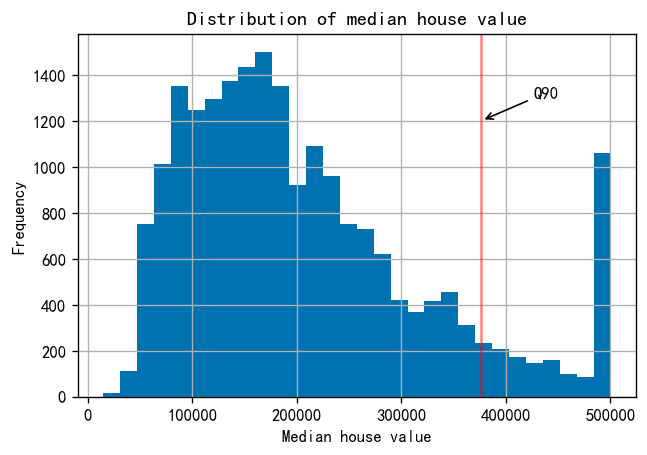

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind') # Set style for matplotlib
plt.rcParams['savefig.dpi'] = 300 # dpi of diagrams
plt.rcParams['figure.dpi'] = 120

housing.median_house_value.hist(bins=30)
plt.axvline(x=housing.median_house_value.quantile(0.9), c='r', alpha=0.5)
plt.annotate(s='Q90',xy=(housing.median_house_value.quantile(0.9),1200),
            xytext=(housing.median_house_value.quantile(0.9)+50000,1300),
            arrowprops={'arrowstyle':'->'})
plt.title('Distribution of median house value')
plt.ylabel('Frequency')
plt.xlabel('Median house value')
plt.show()

In [8]:
features = list(set(housing.columns) - set(['median_house_value'])) # feature name list
q90 = housing.median_house_value.quantile(0.9)
X, y = housing[features], housing.median_house_value.map(lambda x: 1 if x>q90 else 0)

## Scorecard Model

In [10]:
from scorecardbundle.feature_discretization import ChiMerge as cm
from scorecardbundle.feature_discretization import FeatureIntervalAdjustment as fia
from scorecardbundle.feature_encoding import WOE as woe
from scorecardbundle.feature_selection import FeatureSelection as fs
from scorecardbundle.model_training import LogisticRegressionScoreCard as lrsc
from scorecardbundle.model_evaluation import ModelEvaluation as me

# import sys
# from imp import reload
# sys.path.append('D:\\WH_Codes\\Github\\Scorecard-Bundle\\scorecardbundle')

# from feature_discretization import ChiMerge as cm
# from feature_discretization import FeatureIntervalAdjustment as fia
# from feature_encoding import WOE as woe
# from feature_selection import FeatureSelection as fs
# from model_training import LogisticRegressionScoreCard as lrsc
# from model_evaluation import ModelEvaluation as me
# reload(cm)
# reload(fia)
# reload(woe)
# reload(fs)
# reload(lrsc)
# reload(me)
# import numpy as np

### Feature Discretization with ChiMerge

In [11]:
trans_cm = cm.ChiMerge(max_intervals=10, min_intervals=5, output_dataframe=True)
result_cm = trans_cm.fit_transform(X, y) 
result_cm.head()

,latitude,households,median_income,total_rooms,housing_median_age,total_bedrooms,longitude,population
0,37.75999999999999~37.9,-inf~248.0,7.7197~8.946750000000014,319.0~1176.0,36.0~45.0,-inf~335.0,-122.41~-122.01000000000002,-inf~455.0
1,37.75999999999999~37.9,1087.0~1257.4399999999987,7.7197~8.946750000000014,4324.0~11212.11000000003,19.0~33.0,685.0~1371.4399999999987,-122.41~-122.01000000000002,1529.0~3570.0
2,37.75999999999999~37.9,-inf~248.0,6.696683000000002~7.7197,1176.0~2012.0,51.0~inf,-inf~335.0,-122.41~-122.01000000000002,455.0~873.0
3,37.75999999999999~37.9,-inf~248.0,5.048162~5.753465,1176.0~2012.0,51.0~inf,-inf~335.0,-122.41~-122.01000000000002,455.0~873.0
4,37.75999999999999~37.9,248.0~260.0,3.3187550000000003~3.9669399999999992,1176.0~2012.0,51.0~inf,-inf~335.0,-122.41~-122.01000000000002,455.0~873.0


In [28]:
with open('data.pkl','wb') as f:
    pickle.dump([X,y,result_cm],f)
# with open('data.pkl','rb') as f:
#     X,y,result_cm = pickle.load(f)

In [12]:
trans_cm.boundaries_ # show boundaries for all features

{'latitude': array([33.23, 33.63, 34.  , 34.49, 36.97, 37.6 , 37.76, 37.9 , 37.99,
          inf]),
 'households': array([ 248.  ,  260.  ,  409.  ,  415.  ,  853.  , 1026.  , 1087.  ,
        1257.44,     inf]),
 'median_income': array([3.0083  , 3.318755, 3.96694 , 5.048162, 5.753465, 6.310133,
        6.696683, 7.7197  , 8.94675 ,      inf]),
 'total_rooms': array([  319.  ,  1176.  ,  2012.  ,  2499.  ,  2577.  ,  2657.  ,
         4178.86,  4324.  , 11212.11,      inf]),
 'housing_median_age': array([ 9., 17., 19., 33., 34., 36., 45., 47., 51., inf]),
 'total_bedrooms': array([ 335.  ,  341.  ,  367.  ,  396.  ,  599.  ,  685.  , 1371.44,
        2216.27,     inf]),
 'longitude': array([-122.62  , -122.41  , -122.01  , -121.58  , -120.2079, -118.98  ,
        -118.56  , -118.37  , -117.1712,       inf]),
 'population': array([ 455.,  873.,  903.,  992., 1275., 1460., 1529., 3570.,   inf])}

### Evaluate Predictabilty

In [13]:
trans_woe = woe.WOE_Encoder(output_dataframe=True)
result_woe = trans_woe.fit_transform(result_cm, y) 
result_woe.head()

,latitude,households,median_income,total_rooms,housing_median_age,total_bedrooms,longitude,population
0,1.056961,0.018522,3.127753,-0.695164,0.138455,0.053637,0.591383,0.190371
1,1.056961,0.330165,3.127753,0.441041,-0.037581,0.129833,0.591383,-0.325632
2,1.056961,0.018522,1.813689,-0.234270,1.127234,0.053637,0.591383,0.365609
3,1.056961,0.018522,0.293426,-0.234270,1.127234,0.053637,0.591383,0.365609
4,1.056961,0.442561,-0.725126,-0.234270,1.127234,0.053637,0.591383,0.365609


In [14]:
trans_woe.iv_

{'latitude': 0.9504894403382349,
 'households': 0.019888164530506396,
 'median_income': 2.552396950989008,
 'total_rooms': 0.1219220643297866,
 'housing_median_age': 0.20470134738721332,
 'total_bedrooms': 0.021228005648957656,
 'longitude': 1.1187244979212616,
 'population': 0.09478400335153835}

### Feature Engineering (manually adjusting feature intervals)

Analyze the sample distribution and event rate distribution for each feature, and adjust the feature intervals so that the feature's predictability is intuitive to humen (high expalinability). Of course the feature need to maintain a reasonable predicbility (e.g. has a IV larger than 0.02) 

In [108]:
feature_list = []

#### latitude

     x_b  event_freq  sample_size  event_rate
0  33.23         106         1663    0.063740
1  33.63         123          429    0.286713
2  34.00         328         4218    0.077762
3  34.49         687         4634    0.148252
4  36.97          39         2074    0.018804
5  37.60         406         1846    0.219935
6  37.76          44         1018    0.043222
7  37.90         263         1086    0.242173
8  37.99          45          585    0.076923
9    inf          22         3087    0.007127


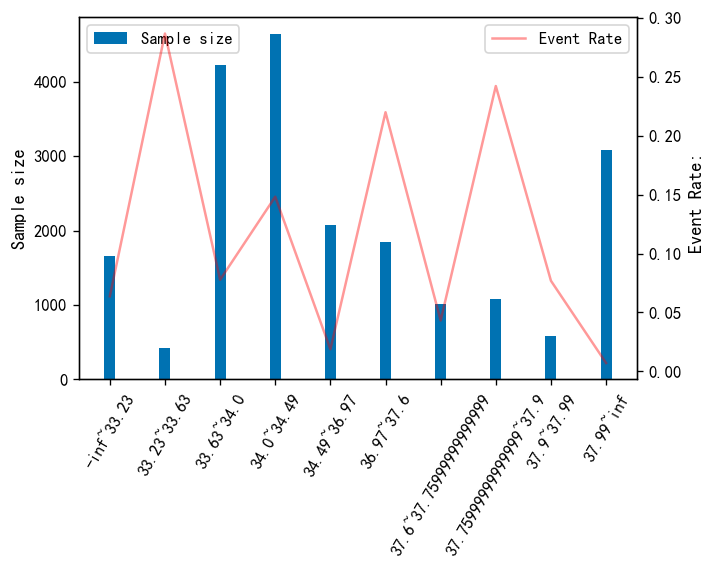

In [15]:
fia.plot_event_dist(result_cm['latitude'],y,x_rotation=60)

In [16]:
new_x = cm.assign_interval_str(X['latitude'].values,[34,37.6]) # pass new interval boundaries
woe.woe_vector(new_x, y.values)

({'-inf~34.0': -0.13714847540165928,
  '34.0~37.6': 0.31730043863505075,
  '37.6~inf': -0.47250571535797914},
 0.10452057389046457)

    x_b  event_freq  sample_size  event_rate
0  34.0         557         6310    0.088273
1  37.6        1132         8554    0.132336
2   inf         374         5776    0.064751


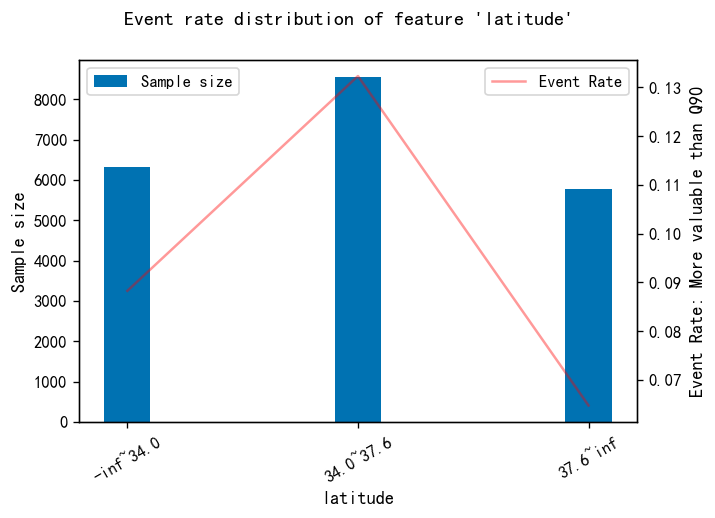

In [17]:
fia.plot_event_dist(new_x,y,title="Event rate distribution of feature 'latitude'", x_label='latitude',y_label='More valuable than Q90',
                   x_rotation=30,save=True)

In [111]:
result_cm['latitude'] = new_x # reasonable explainability and predictability. Select.
feature_list.append('latitude')
print(feature_list)

['latitude']


#### median_income

        x_b  event_freq  sample_size  event_rate
0  3.008300         100         7432    0.013455
1  3.318755          62         1856    0.033405
2  3.966940         158         3096    0.051034
3  5.048162         306         3921    0.078041
4  5.753465         214         1651    0.129618
5  6.310133         169          826    0.204600
6  6.696683         116          413    0.280872
7  7.719700         252          622    0.405145
8  8.946750         294          410    0.717073
9       inf         392          413    0.949153


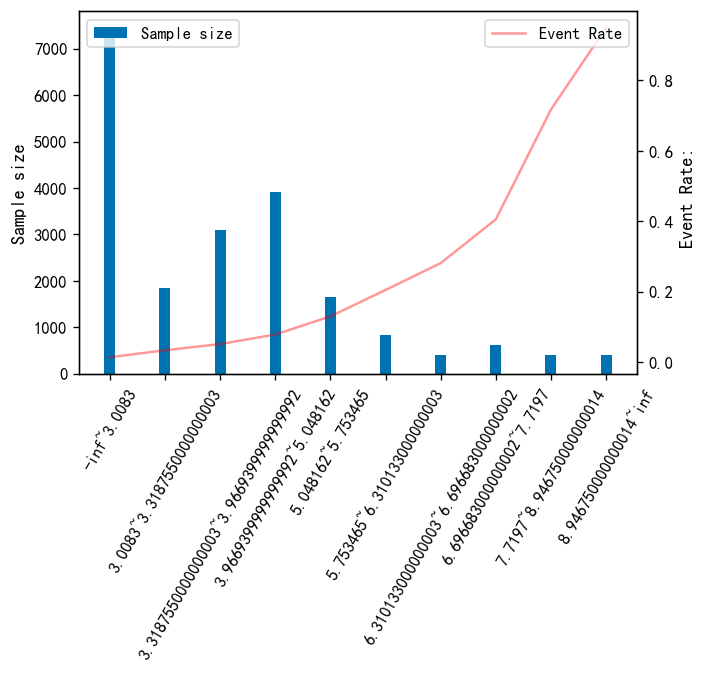

In [18]:
col = 'median_income'
fia.plot_event_dist(result_cm[col],y,x_rotation=60)

perfect curve. reasonable explainability and high iv. 

In [113]:
feature_list.append(col)
print(feature_list)

['latitude', 'median_income']


#### total_rooms

        x_b  event_freq  sample_size  event_rate
0    319.00          40          414    0.096618
1   1176.00         152         2895    0.052504
2   2012.00         500         6191    0.080762
3   2499.00         329         3093    0.106369
4   2577.00          61          417    0.146283
5   2657.00          28          410    0.068293
6   4178.86         586         4536    0.129189
7   4324.00          16          208    0.076923
8  11212.11         334         2269    0.147201
9       inf          17          207    0.082126


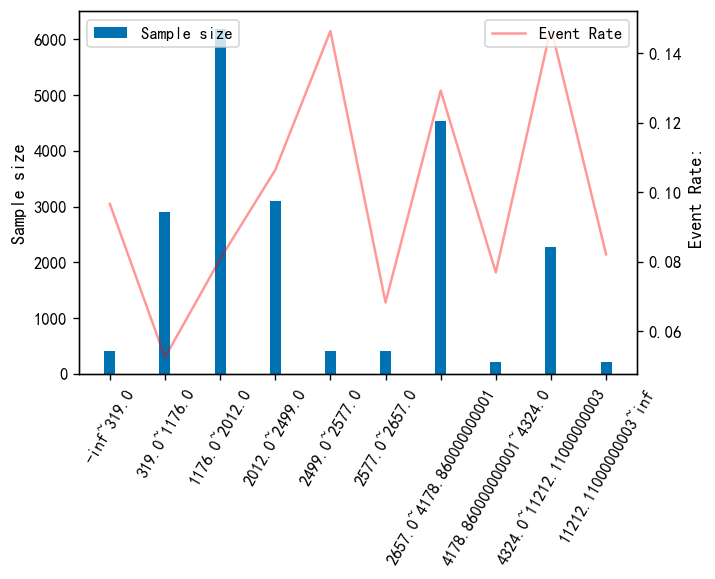

In [19]:
col = 'total_rooms'
fia.plot_event_dist(result_cm[col],y,x_rotation=60)

In [20]:
new_x = cm.assign_interval_str(X[col].values,[1176,2012,2499,4178]) # pass new interval boundaries
woe.woe_vector(new_x, y.values)

({'-inf~1176.0': -0.5893678861396352,
  '1176.0~2012.0': -0.2342701386348836,
  '2012.0~2499.0': 0.06938658739073947,
  '2499.0~4178.0': 0.25971438111245476,
  '4178.0~inf': 0.35509634511192906},
 0.09808588854074046)

      x_b  event_freq  sample_size  event_rate
0  1176.0         192         3309    0.058024
1  2012.0         500         6191    0.080762
2  2499.0         329         3093    0.106369
3  4178.0         675         5363    0.125862
4     inf         367         2684    0.136736


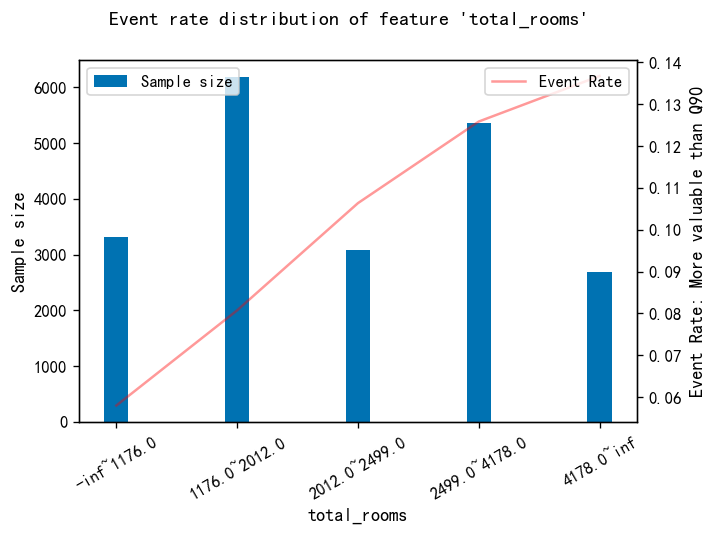

In [21]:
fia.plot_event_dist(new_x,y,title=f"Event rate distribution of feature '{col}'", x_label=col,y_label='More valuable than Q90',
                   x_rotation=30,save=True)

In [123]:
result_cm[col] = new_x # reasonable explainability and predictability. Select.
feature_list.append(col)
print(feature_list)

['latitude', 'median_income', 'total_rooms']


#### total_bedrooms

       x_b  event_freq  sample_size  event_rate
0   335.00         694         6617    0.104881
1   341.00          12          223    0.053812
2   367.00         106         1007    0.105263
3   396.00          82         1039    0.078922
4   599.00         576         5784    0.099585
5   685.00         116         1447    0.080166
6  1371.44         415         3697    0.112253
7  2216.27          53          619    0.085622
8      inf           9          207    0.043478


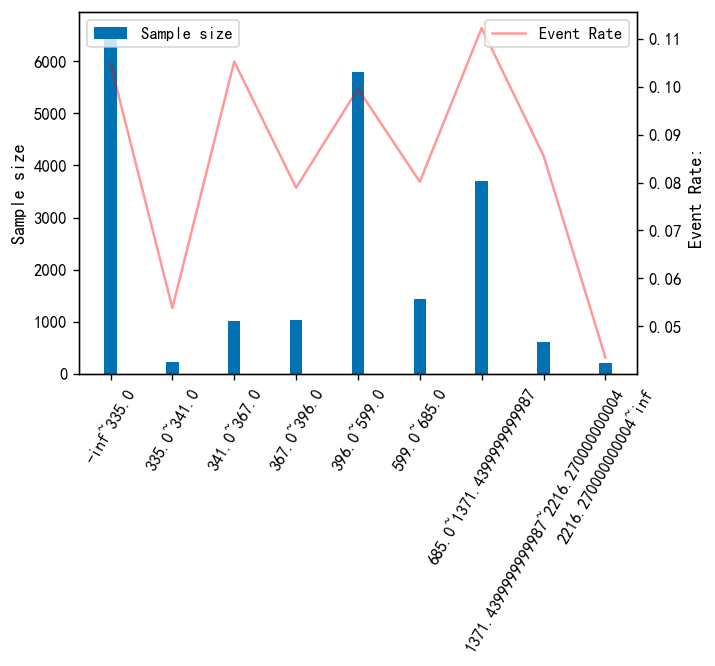

In [22]:
fia.plot_event_dist(result_cm['total_bedrooms'],y,x_rotation=60)

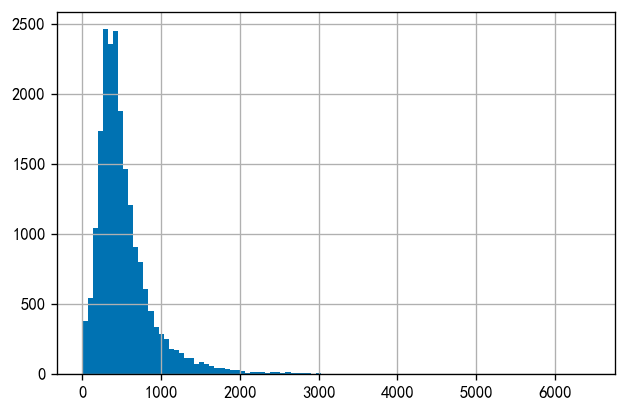

In [30]:
X['total_bedrooms'].hist(bins=100)

In [90]:
X['total_bedrooms'].quantile([0.2,0.4,0.6,0.8])

0.2    271.0
0.4    379.0
0.6    500.0
0.8    716.0
Name: total_bedrooms, dtype: float64

In [23]:
new_x = cm.assign_interval_str(X['total_bedrooms'].values,[100,396,685])
woe.woe_vector(new_x, y.values)

({'-inf~100.0': 0.12538864705096214,
  '100.0~396.0': -0.0022927002756428826,
  '396.0~685.0': -0.04819055041901704,
  '685.0~inf': 0.059795494674488914},
 0.0021111945212758535)

     x_b  event_freq  sample_size  event_rate
0  100.0          71          635    0.111811
1  396.0         823         8251    0.099745
2  685.0         692         7231    0.095699
3    inf         477         4523    0.105461


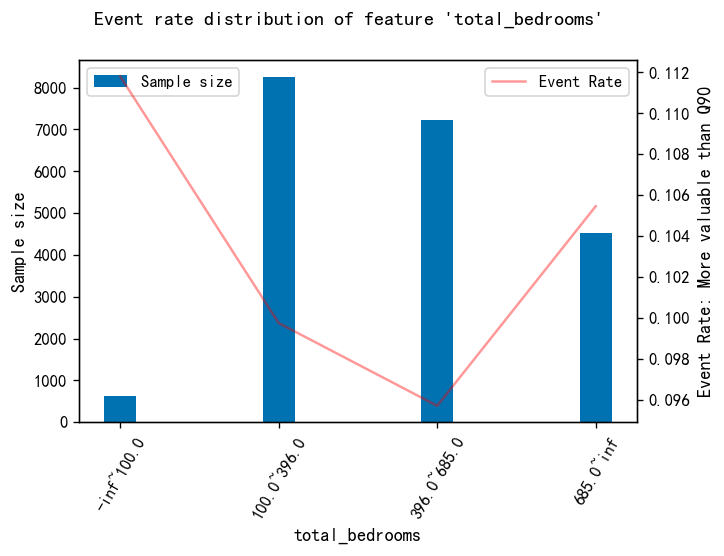

In [24]:
fia.plot_event_dist(new_x,y,title="Event rate distribution of feature 'total_bedrooms'", x_label='total_bedrooms',
                    y_label='More valuable than Q90',
                   x_rotation=60,save=True)

iv is too low. drop

#### housing_median_age

    x_b  event_freq  sample_size  event_rate
0   9.0         105         1305    0.080460
1  17.0         184         3451    0.053318
2  19.0          74         1072    0.069030
3  33.0         672         6955    0.096621
4  34.0          91          689    0.132075
5  36.0         142         1686    0.084223
6  45.0         370         3271    0.113115
7  47.0          33          443    0.074492
8  51.0          67          495    0.135354
9   inf         325         1273    0.255302


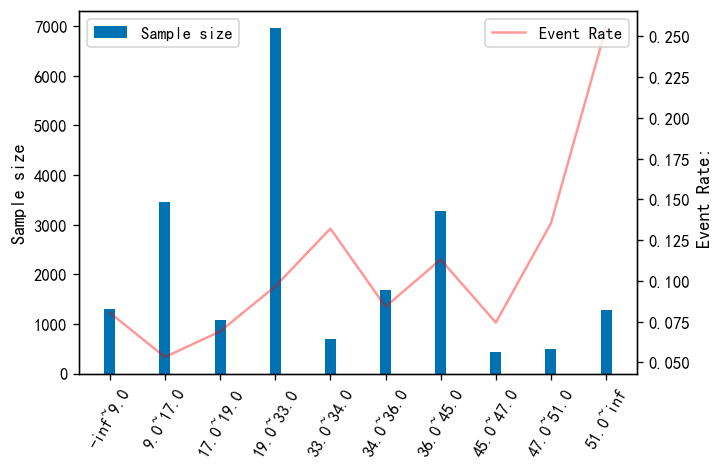

In [25]:
col = 'housing_median_age'
fia.plot_event_dist(result_cm[col],y,x_rotation=60)

In [26]:
new_x = cm.assign_interval_str(X[col].values,[33,45]) # pass new interval boundaries
woe.woe_vector(new_x, y.values)

({'-inf~33.0': -0.23151856507333088,
  '33.0~45.0': 0.07392379616298213,
  '45.0~inf': 0.7621184289542517},
 0.11553294297616867)

    x_b  event_freq  sample_size  event_rate
0  33.0        1035        12783    0.080967
1  45.0         603         5646    0.106801
2   inf         425         2211    0.192221


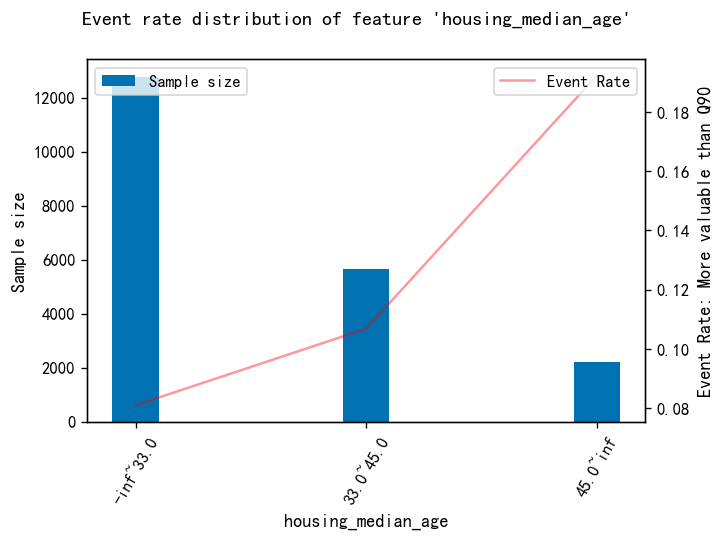

In [27]:
fia.plot_event_dist(new_x,y,title=f"Event rate distribution of feature '{col}'", x_label=col,
                    y_label='More valuable than Q90',
                   x_rotation=60,save=True)

In [133]:
result_cm[col] = new_x # great explainability and predictability. Select.
feature_list.append(col)
print(feature_list)

['latitude', 'median_income', 'total_rooms', 'housing_median_age']


#### longitude

        x_b  event_freq  sample_size  event_rate
0 -122.6200           5          629    0.007949
1 -122.4100         261          909    0.287129
2 -122.0100         393         2352    0.167092
3 -121.5800         138         1682    0.082045
4 -120.2079          13         2478    0.005246
5 -118.9800          75         1654    0.045345
6 -118.5600          73          432    0.168981
7 -118.3700         456         1330    0.342857
8 -117.1712         623         7522    0.082824
9       inf          26         1652    0.015738


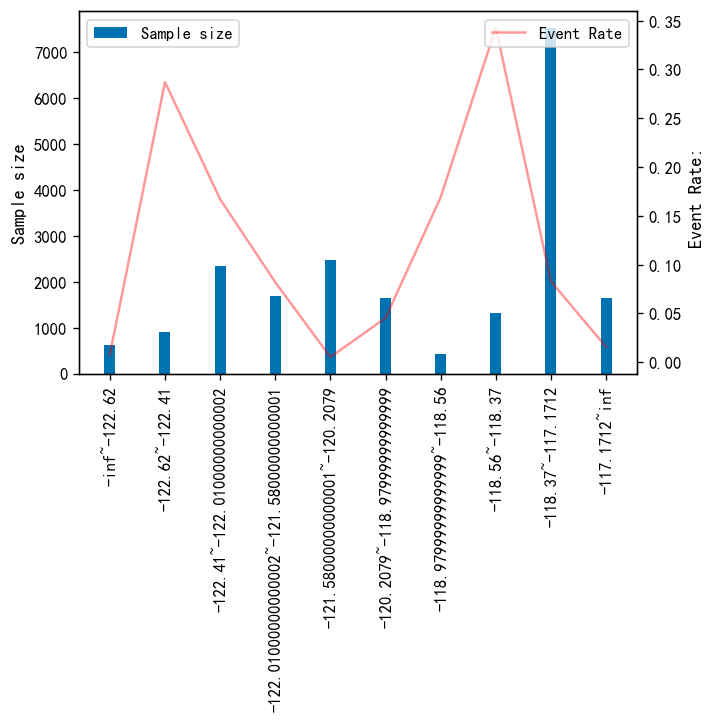

In [135]:
col = 'longitude'
fia.plot_event_dist(result_cm[col],y,x_rotation=90)

In [140]:
new_x = cm.assign_interval_str(X[col].values,[-122.41,-118.37]) # pass new interval boundaries
woe.woe_vector(new_x, y.values)

({'-118.37~inf': -0.3775625638820992,
  '-122.41~-118.37': 0.16330791175493853,
  '-inf~-122.41': 0.6329135863543248},
 0.10644872149066115)

      x_b  event_freq  sample_size  event_rate
0 -122.41         266         1538    0.172952
1 -118.37        1148         9928    0.115633
2     inf         649         9174    0.070743


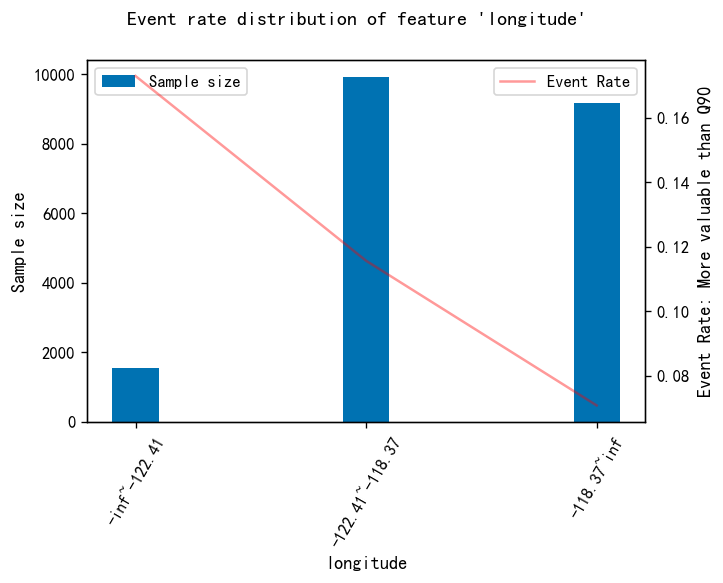

In [141]:
fia.plot_event_dist(new_x,y,title=f"Event rate distribution of feature '{col}'", x_label=col,
                    y_label='More valuable than Q90',
                   x_rotation=60,save=True)

In [142]:
result_cm[col] = new_x # great explainability and predictability. Select.
feature_list.append(col)
print(feature_list)

['latitude', 'median_income', 'total_rooms', 'housing_median_age', 'longitude']


#### households

       x_b  event_freq  sample_size  event_rate
0   248.00         399         3926    0.101630
1   260.00          65          441    0.147392
2   409.00         564         5956    0.094694
3   415.00          32          209    0.153110
4   853.00         763         7840    0.097321
5  1026.00         107          824    0.129854
6  1087.00          16          207    0.077295
7  1257.44          55          411    0.133820
8      inf          62          826    0.075061


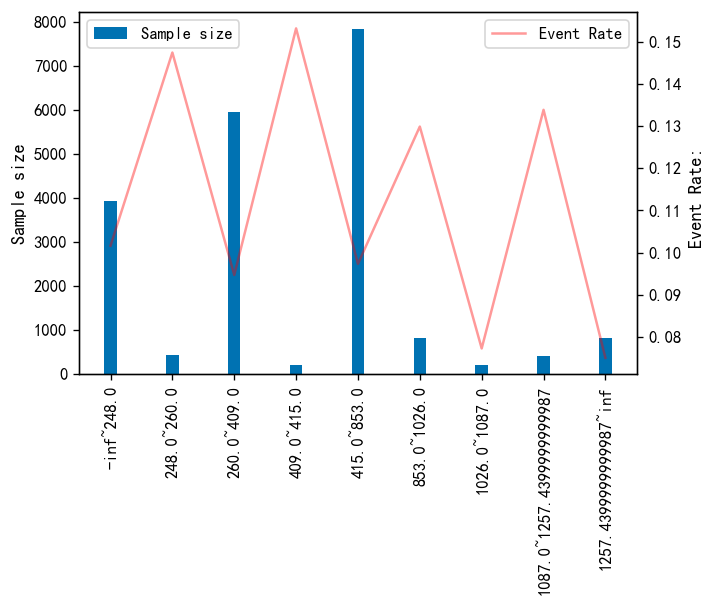

In [143]:
col = 'households'
fia.plot_event_dist(result_cm[col],y,x_rotation=90)

In [150]:
new_x = cm.assign_interval_str(X[col].values,[260,415,853]) # pass new interval boundaries
woe.woe_vector(new_x, y.values)

({'-inf~260.0': 0.06814680655869465,
  '260.0~415.0': -0.03696709500090333,
  '415.0~853.0': -0.0295843152686716,
  '853.0~inf': 0.06359658014437408},
 0.0021963088761730847)

     x_b  event_freq  sample_size  event_rate
0  260.0         464         4367    0.106251
1  415.0         596         6165    0.096675
2  853.0         763         7840    0.097321
3    inf         240         2268    0.105820


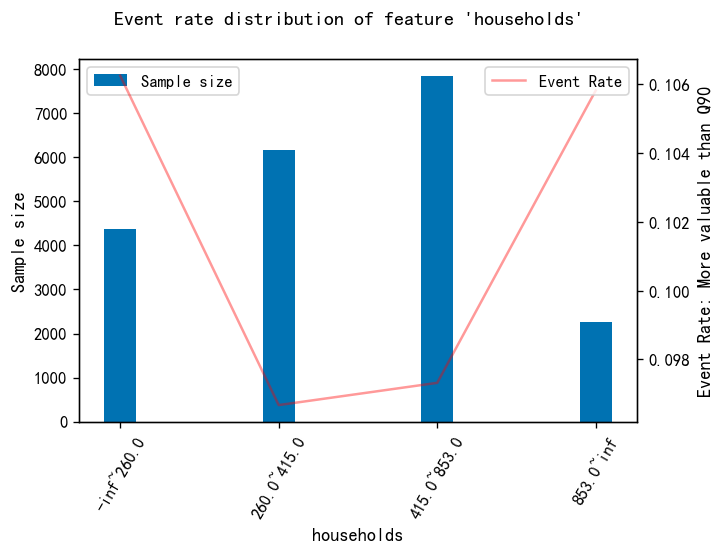

In [151]:
fia.plot_event_dist(new_x,y,title=f"Event rate distribution of feature '{col}'", x_label=col,
                    y_label='More valuable than Q90',
                   x_rotation=60,save=True)

In [152]:
result_cm[col] = new_x # great explainability but low predictability. Can select.
feature_list.append(col)
print(feature_list)

['latitude', 'median_income', 'total_rooms', 'housing_median_age', 'longitude', 'households']


#### population

      x_b  event_freq  sample_size  event_rate
0   455.0         196         1655    0.118429
1   873.0         655         4747    0.137982
2   903.0          35          417    0.083933
3   992.0         152         1234    0.123177
4  1275.0         342         3515    0.097297
5  1460.0         150         1850    0.081081
6  1529.0          67          619    0.108239
7  3570.0         429         5779    0.074234
8     inf          37          824    0.044903


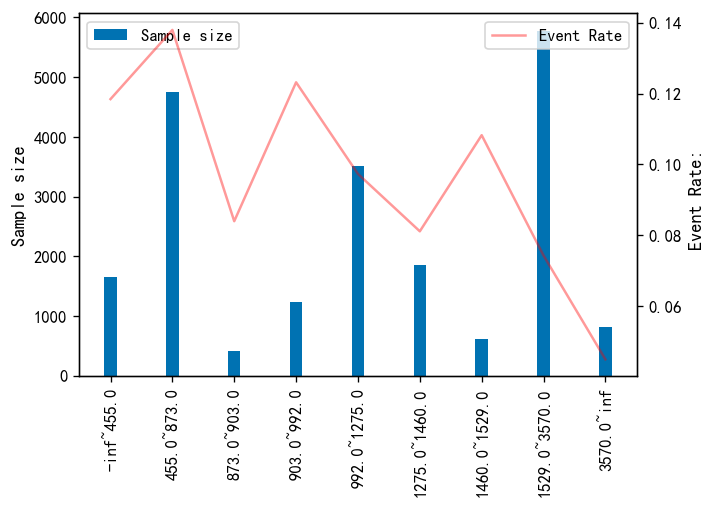

In [153]:
col = 'population'
fia.plot_event_dist(result_cm[col],y,x_rotation=90)

In [154]:
new_x = cm.assign_interval_str(X[col].values,[873,992,1275,1529,3570]) # pass new interval boundaries
woe.woe_vector(new_x, y.values)

({'-inf~873.0': 0.3224417793753003,
  '1275.0~1529.0': -0.14191361418425064,
  '1529.0~3570.0': -0.3256318994038957,
  '3570.0~inf': -0.8595473141174292,
  '873.0~992.0': 0.13994394383986966,
  '992.0~1275.0': -0.029859032997923432},
 0.0878048668576403)

      x_b  event_freq  sample_size  event_rate
0   873.0         851         6402    0.132927
1   992.0         187         1651    0.113265
2  1275.0         342         3515    0.097297
3  1529.0         217         2469    0.087890
4  3570.0         429         5779    0.074234
5     inf          37          824    0.044903


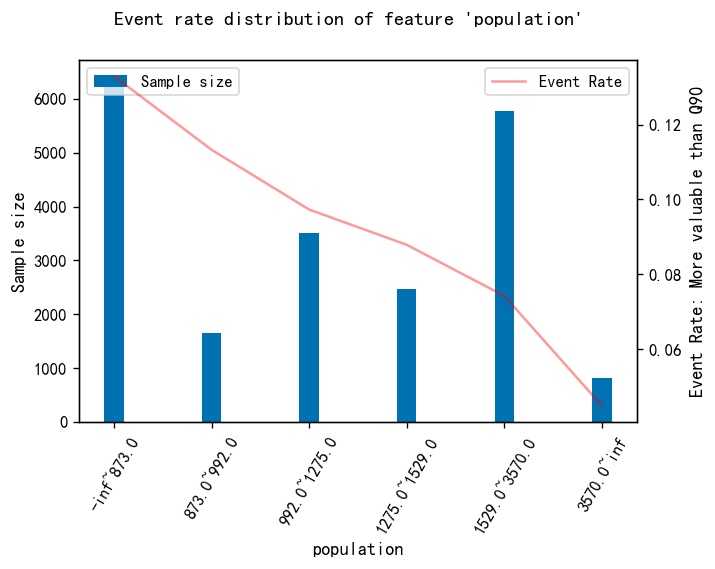

In [155]:
fia.plot_event_dist(new_x,y,title=f"Event rate distribution of feature '{col}'", x_label=col,
                    y_label='More valuable than Q90',
                   x_rotation=60,save=True)

In [156]:
result_cm[col] = new_x # great explainability and predictability. Select.
feature_list.append(col)
print(feature_list)

['latitude', 'median_income', 'total_rooms', 'housing_median_age', 'longitude', 'households', 'population']


### Feature Encoding with Weight of Evidence (WOE)

In [157]:
trans_woe = woe.WOE_Encoder(output_dataframe=True)
result_woe = trans_woe.fit_transform(result_cm[feature_list], y) # WOE is fast. This only takes less then 1 seconds
result_woe.head()

,latitude,median_income,total_rooms,housing_median_age,longitude,households,population
0,-0.472506,3.127753,-0.589368,0.073924,0.163308,0.068147,0.322442
1,-0.472506,3.127753,0.355096,-0.231519,0.163308,0.063597,-0.325632
2,-0.472506,1.813689,-0.234270,0.762118,0.163308,0.068147,0.322442
3,-0.472506,0.293426,-0.234270,0.762118,0.163308,0.068147,0.322442
4,-0.472506,-0.725126,-0.234270,0.762118,0.163308,0.068147,0.322442


In [158]:
trans_woe.iv_ # the information value (iv) for each feature

{'latitude': 0.10452057389046457,
 'median_income': 2.552396950989008,
 'total_rooms': 0.09808588854074046,
 'housing_median_age': 0.11553294297616867,
 'longitude': 0.10644872149066115,
 'households': 0.0021963088761730847,
 'population': 0.0878048668576403}

In [159]:
trans_woe.result_dict_ # the WOE dictionary and iv for each feature

{'latitude': ({'-inf~34.0': -0.13714847540165928,
   '34.0~37.6': 0.31730043863505075,
   '37.6~inf': -0.47250571535797914},
  0.10452057389046457),
 'median_income': ({'-inf~3.0083': -2.097070400737622,
   '3.0083~3.3187550000000003': -1.1673056358327056,
   '3.3187550000000003~3.9669399999999992': -0.725126302080723,
   '3.9669399999999992~5.048162': -0.27149901108965147,
   '5.048162~5.753465': 0.293426150436995,
   '5.753465~6.310133000000003': 0.8399777179011504,
   '6.310133000000003~6.696683000000002': 1.2576210737514288,
   '6.696683000000002~7.7197': 1.8136891033088558,
   '7.7197~8.946750000000014': 3.127752597655504,
   '8.946750000000014~inf': 5.12450242348254},
  2.552396950989008),
 'total_rooms': ({'-inf~1176.0': -0.5893678861396352,
   '1176.0~2012.0': -0.2342701386348836,
   '2012.0~2499.0': 0.06938658739073947,
   '2499.0~4178.0': 0.25971438111245476,
   '4178.0~inf': 0.35509634511192906},
  0.09808588854074046),
 'housing_median_age': ({'-inf~33.0': -0.23151856507333

### Feature Selection

Feature Selection is an important step for Scorecard modelding and should at least filter out the features with too little predictabilty (e.g. iv<0.02) and the features that are causing co-linearity problem (e.g. Use VIF or Pearson correlation coefficient);

In [160]:
fs.selection_with_iv_corr(trans_woe, result_woe)

,factor,IV,woe_dict,corr_with
1,median_income,2.552397,"{'-inf~3.0083': -2.097070400737622, '3.0083~3....",{}
3,housing_median_age,0.115533,"{'-inf~33.0': -0.23151856507333088, '33.0~45.0...",{}
4,longitude,0.106449,"{'-118.37~inf': -0.3775625638820992, '-122.41~...",{}
0,latitude,0.104521,"{'-inf~34.0': -0.13714847540165928, '34.0~37.6...",{}
2,total_rooms,0.098086,"{'-inf~1176.0': -0.5893678861396352, '1176.0~2...",{'population': -0.7174063078322093}
6,population,0.087805,"{'-inf~873.0': 0.3224417793753003, '1275.0~152...",{'total_rooms': -0.7174063078322093}
5,households,0.002196,"{'-inf~260.0': 0.06814680655869465, '260.0~415...",{}


In [161]:
# "total_rooms" and "population" are high correlated. Drop "population" since it has lower IV.
feature_list.remove("population")
feature_list

['latitude',
 'median_income',
 'total_rooms',
 'housing_median_age',
 'longitude',
 'households']

In [169]:
trans_woe = woe.WOE_Encoder(output_dataframe=True)
result_woe = trans_woe.fit_transform(result_cm[feature_list], y) # WOE is fast. This only takes less then 1 seconds
result_woe.head()

,latitude,median_income,total_rooms,housing_median_age,longitude,households
0,-0.472506,3.127753,-0.589368,0.073924,0.163308,0.068147
1,-0.472506,3.127753,0.355096,-0.231519,0.163308,0.063597
2,-0.472506,1.813689,-0.234270,0.762118,0.163308,0.068147
3,-0.472506,0.293426,-0.234270,0.762118,0.163308,0.068147
4,-0.472506,-0.725126,-0.234270,0.762118,0.163308,0.068147


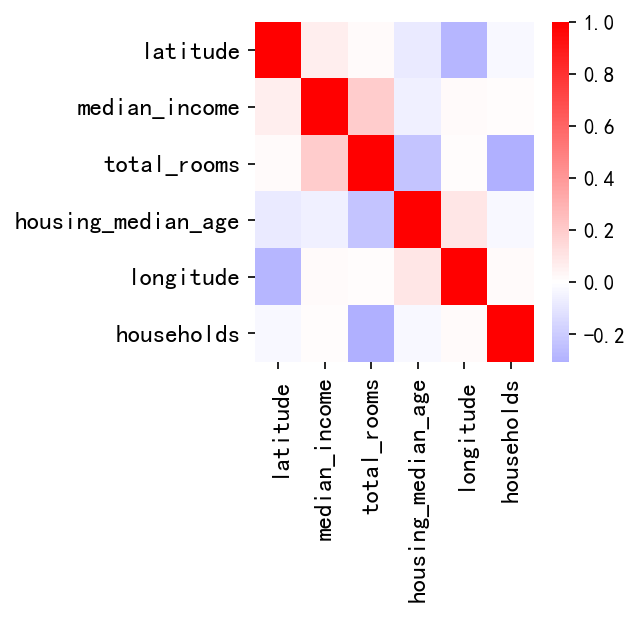

In [170]:
corr_matrix = result_woe.corr()
plt.figure(figsize=(3,3))
sns.heatmap(corr_matrix, cmap = 'bwr', center=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Model Training

In [171]:
model = lrsc.LogisticRegressionScoreCard(trans_woe, PDO=-20, basePoints=100, verbose=True)
model.fit(result_woe, y)

Access the Scorecard rule table by attribute `woe_df_`. This is the Scorecard model.

In [172]:
model.woe_df_

,feature,value,woe,beta,score
0,latitude,-inf~34.0,-0.137148,1.374173,11.0
1,latitude,34.0~37.6,0.317300,1.374173,29.0
2,latitude,37.6~inf,-0.472506,1.374173,-2.0
3,median_income,-inf~3.0083,-2.097070,1.070766,-48.0
4,median_income,3.0083~3.3187550000000003,-1.167306,1.070766,-20.0
5,median_income,3.3187550000000003~3.9669399999999992,-0.725126,1.070766,-6.0
6,median_income,3.9669399999999992~5.048162,-0.271499,1.070766,8.0
7,median_income,5.048162~5.753465,0.293426,1.070766,26.0
8,median_income,5.753465~6.310133000000003,0.839978,1.070766,43.0
9,median_income,6.310133000000003~6.696683000000002,1.257621,1.070766,55.0


Scorecard should be applied on the **original feature values** (before discretization and WOE encoding).

Users can manually adjust the Scorecard rules (as shown below, or output excel files to local position, edit it in excel and load it), and use `load_scorecard` parameter of predict() to load the adjusted rule table. See details in the documentation of `load_scorecard`.

In [173]:
sc_table = model.woe_df_.copy()
sc_table['score'][(sc_table.feature=='households') & (sc_table.value=='260.0~415.0')] = 10
sc_table

E:\Installments\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,feature,value,woe,beta,score
0,latitude,-inf~34.0,-0.137148,1.374173,11.0
1,latitude,34.0~37.6,0.317300,1.374173,29.0
2,latitude,37.6~inf,-0.472506,1.374173,-2.0
3,median_income,-inf~3.0083,-2.097070,1.070766,-48.0
4,median_income,3.0083~3.3187550000000003,-1.167306,1.070766,-20.0
5,median_income,3.3187550000000003~3.9669399999999992,-0.725126,1.070766,-6.0
6,median_income,3.9669399999999992~5.048162,-0.271499,1.070766,8.0
7,median_income,5.048162~5.753465,0.293426,1.070766,26.0
8,median_income,5.753465~6.310133000000003,0.839978,1.070766,43.0
9,median_income,6.310133000000003~6.696683000000002,1.257621,1.070766,55.0


In [175]:
result = model.predict(X, load_scorecard=sc_table) # Scorecard should be applied on the original feature values
result.head() # if model object's verbose parameter is set to False, predict will only return Total scores

,latitude,median_income,total_rooms,housing_median_age,longitude,households,TotalScore
0,-2.0,113.0,3.0,60.0,1.0,20.0,195.0
1,-2.0,113.0,24.0,60.0,1.0,20.0,216.0
2,-2.0,73.0,11.0,60.0,1.0,20.0,163.0
3,-2.0,26.0,11.0,60.0,1.0,20.0,116.0
4,-2.0,-6.0,11.0,60.0,1.0,20.0,84.0


### Model Evaluation

In [176]:
evaluation = me.BinaryTargets(y, result['TotalScore'])

In [177]:
evaluation.ks_stat()

0.5541931812491749

KS = 0.538


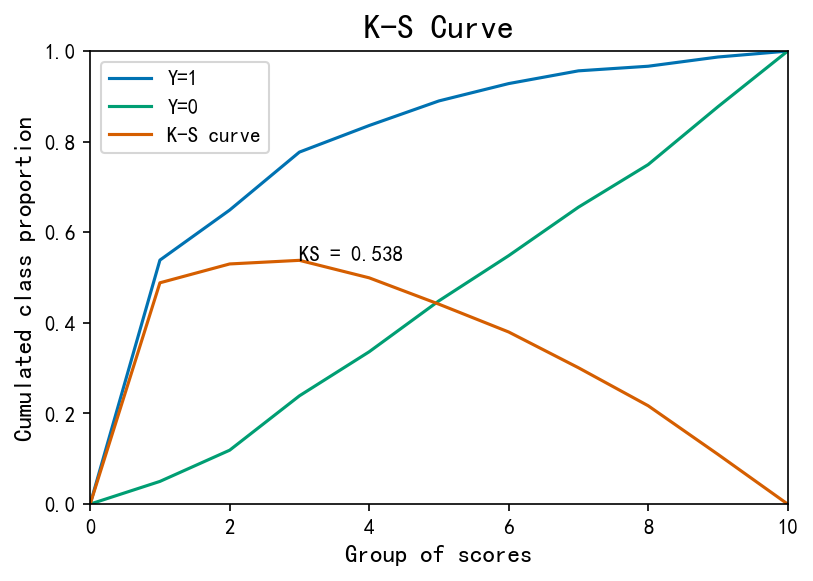

In [179]:
evaluation.plot_ks()

AUC: 0.8541540077221399


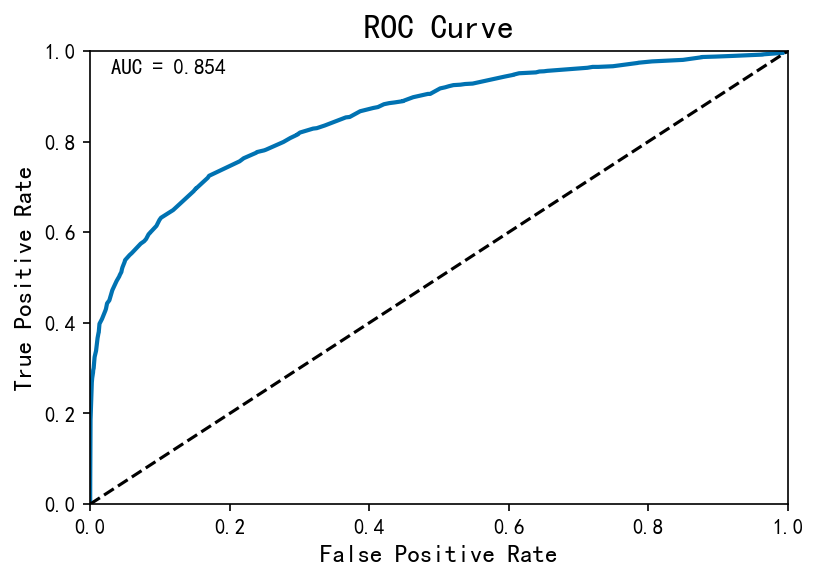

In [180]:
evaluation.plot_roc()

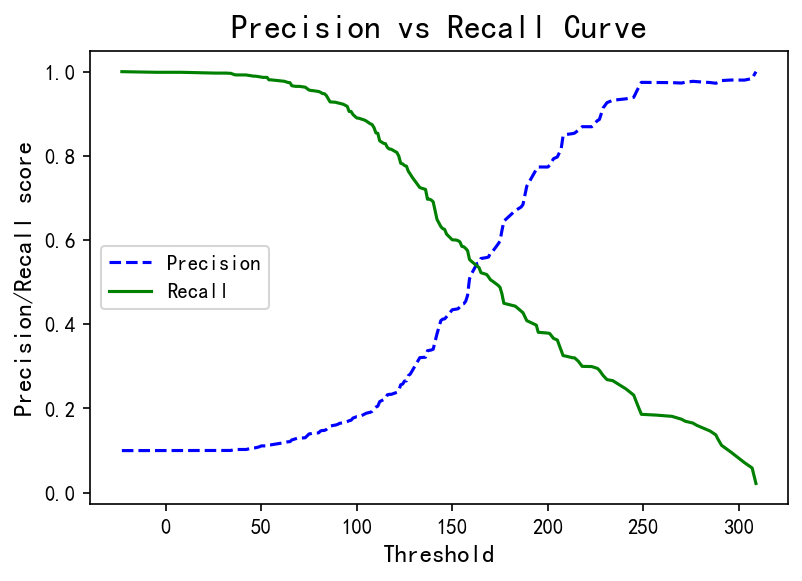

In [181]:
evaluation.plot_precision_recall()

KS = 0.538


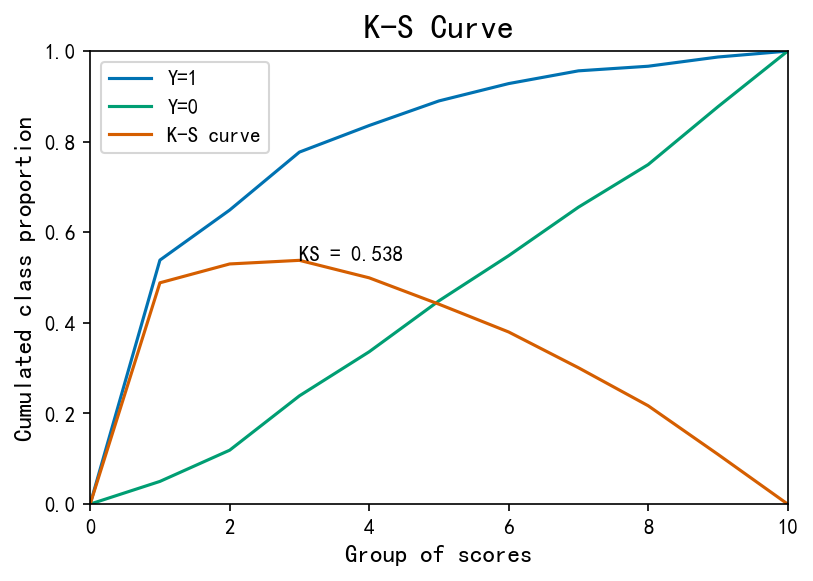

AUC: 0.8541540077221399


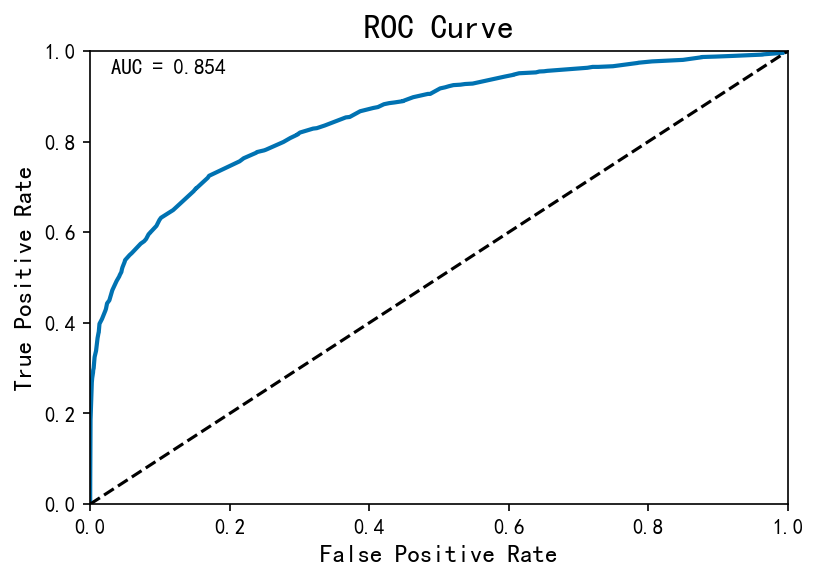

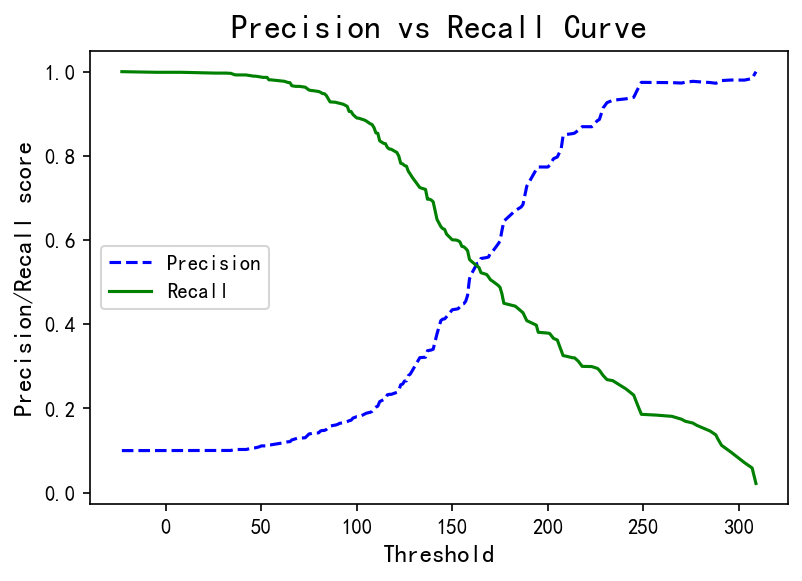

In [178]:
evaluation.plot_all()